# Spaceship Titanic

We are going to use `Spaceship Titanic` dataset for this exercies.

I use Kaggle API to download Kaggle dataset. You can go to the link and download it manually. But I find it easier. For this way you should install `kaggle` library. Download your Kaggle API Token. It will be `kaggle.json`. Move it to `~/.kaggle` path.

`pip3 install kaggle`

And then install the dataset like this. You use this when you want to download a normal dataset:

`kaggle datasets download -d [dataset-name]`

If you're going to install a competetion dataset, then you should change couple of things in command:

`kaggle competitions download -c [dataset-name]`

**Must look notebooks:**

1. https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide#Feature-engineering

2. https://github.com/ezgiturali/MoreThan101-Workshop/blob/main/SpaceTitanic.ipynb

3. https://www.kaggle.com/competitions/spaceship-titanic/code?competitionId=34377&sortBy=voteCount (other notebooks)

In [ ]:
!kaggle competitions download -c spaceship-titanic

In [3]:
!unzip spaceship-titanic.zip

Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
# display shape
print(f"Train data's shape: {train.shape}")
print(f"Test data's shape: {test.shape}")

Train data's shape: (8693, 14)
Test data's shape: (4277, 13)


In [7]:
# display 5 rows
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [9]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [12]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4186.0,28.658146,14.179072,0.0,19.0,26.0,37.0,79.0
RoomService,4195.0,219.266269,607.011289,0.0,0.0,0.0,53.0,11567.0
FoodCourt,4171.0,439.484296,1527.663045,0.0,0.0,0.0,78.0,25273.0
ShoppingMall,4179.0,177.295525,560.821123,0.0,0.0,0.0,33.0,8292.0
Spa,4176.0,303.052443,1117.186015,0.0,0.0,0.0,50.0,19844.0
VRDeck,4197.0,310.710031,1246.994742,0.0,0.0,0.0,36.0,22272.0


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


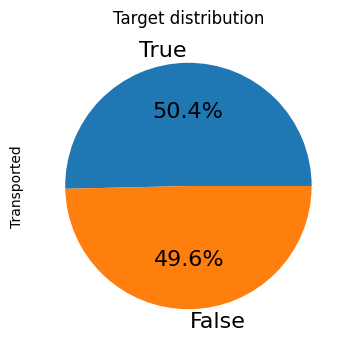

In [7]:
# main goal is to find whether a passenger is transported or not
# let's examine the distribution of 'Transported' feature

plt.figure(figsize=(4,4))

# Pie plot
train['Transported'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':16}).set_title("Target distribution");


### Age and Transported Distribution

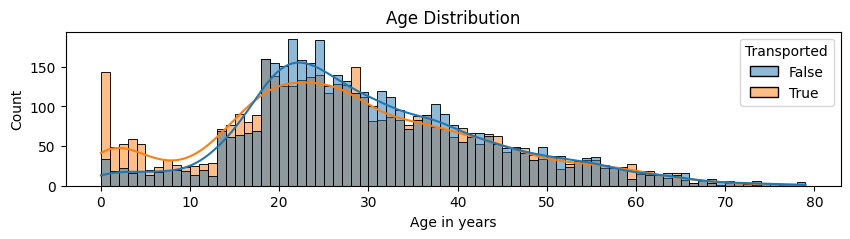

In [10]:
# Feature Distribution - Continous Features
# Figure size
plt.figure(figsize=(10,2))

# Histogram
sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True)

# Aesthetics
plt.title('Age Distribution')
plt.xlabel('Age in years');

**Notes:**

* 0-18 year olds were more likely to be transported than not.

* 18-25 year olds were less likely to be transported than not.

* Over 25 year olds were about equally likely to be transported than not.

**Insight:**

Create a new feature that indicates whether the passanger is a child, adolescent or adult.

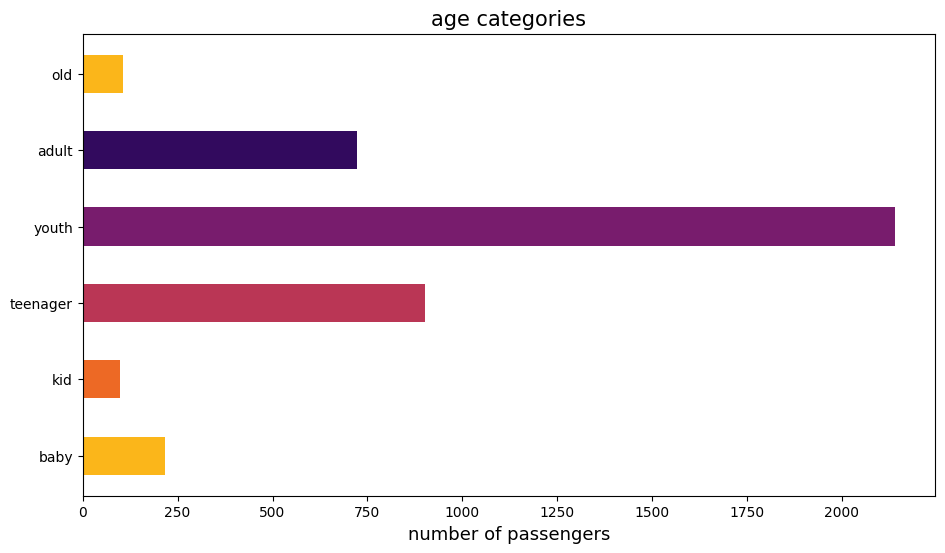

In [11]:
datasets = [train, test]
for data in datasets:
    baby = data[data["Age"] <= 5]
    kid = data[(data["Age"] > 5) & (data["Age"] <= 10)]
    teenager = data[(data["Age"] > 10) & (data["Age"] <= 20)]
    youth = data[(data["Age"] > 20) & (data["Age"] <= 40)]
    adult = data[(data["Age"] > 40) & (data["Age"] <= 60)]
    old = data[(data["Age"] > 60)]

ages = {"baby" : baby.shape[0], "kid" : kid.shape[0],
        "teenager" : teenager.shape[0], "youth" : youth.shape[0],
        "adult" : adult.shape[0], "old" : old.shape[0]}
ages = pd.Series(ages)

plt.figure(figsize = (11, 6))
plt.title("age categories", fontsize = 15)
plt.xlabel("number of passengers", fontsize = 13)

plt.barh(ages.index, ages.values, color = sns.color_palette("inferno_r", 5),
         height = 0.5);

### Expenditure Distribution

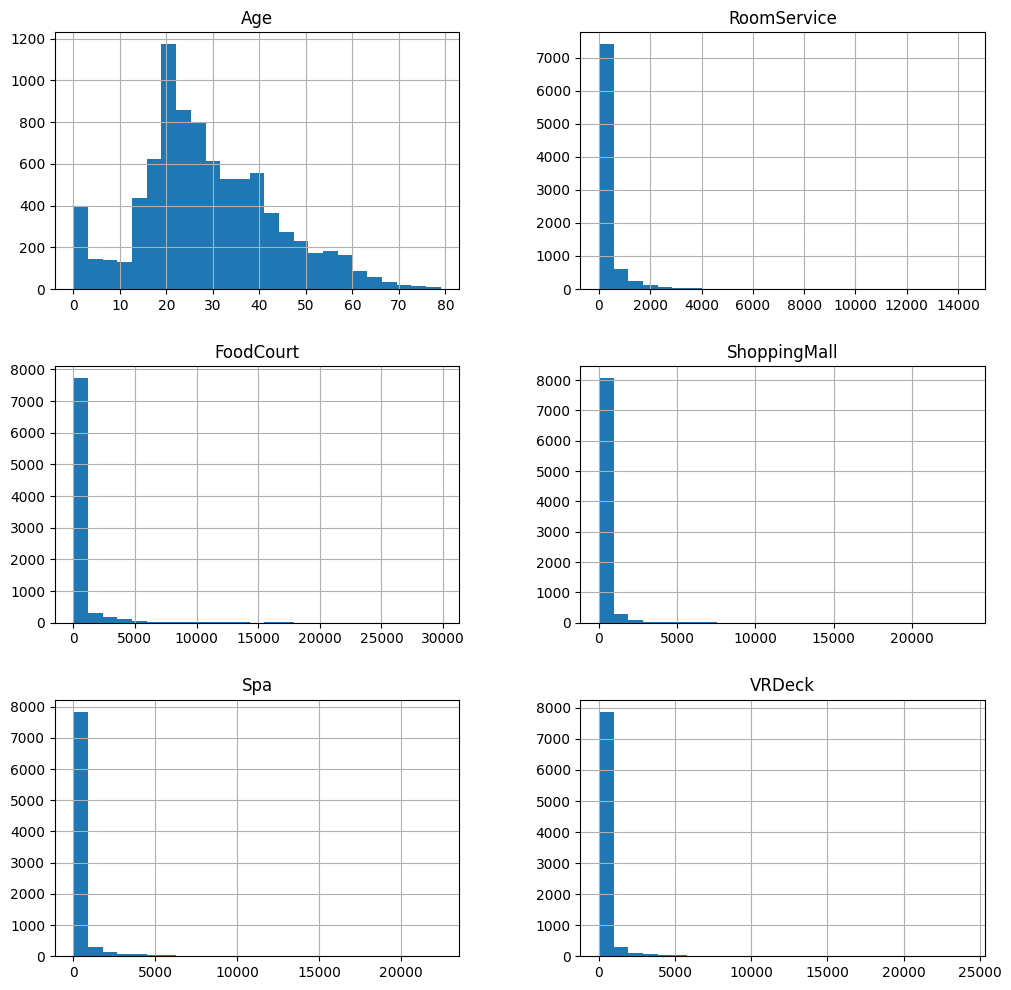

In [12]:
train.hist(bins = 25, figsize = (12, 12))
plt.show()

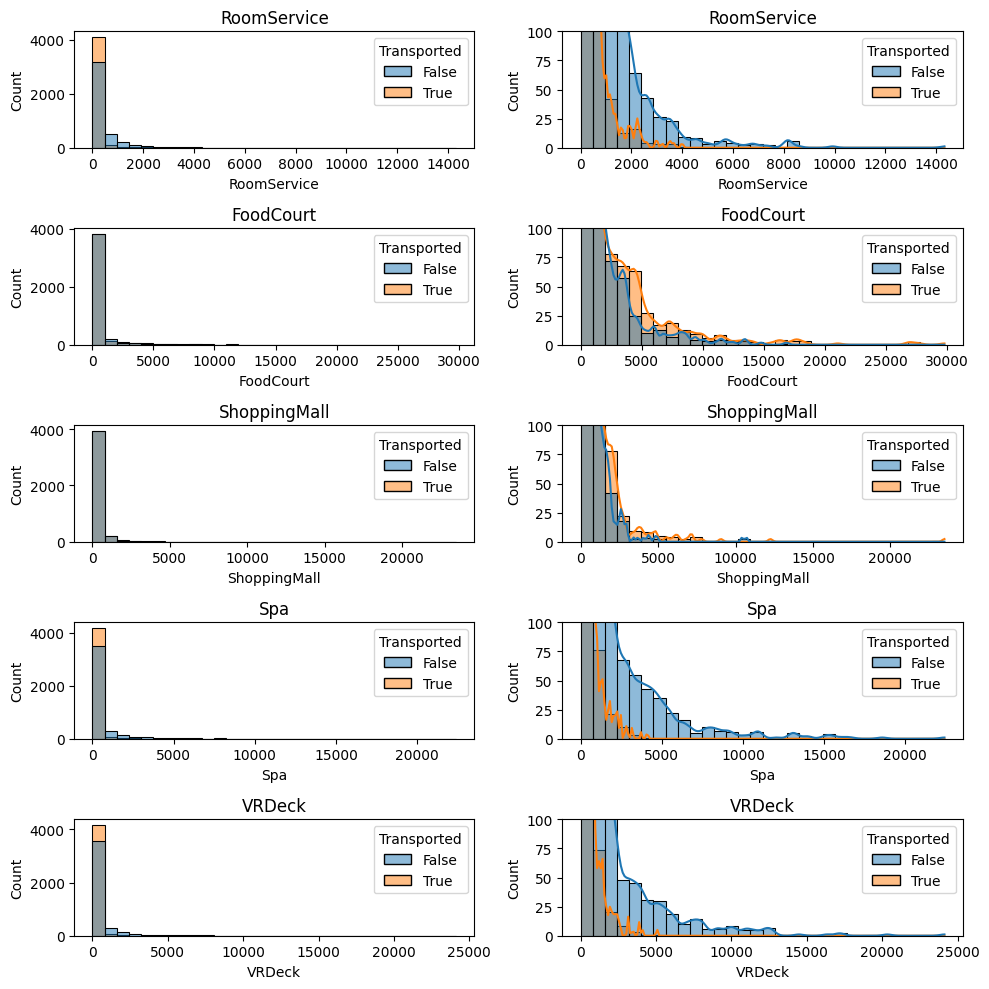

In [13]:
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(10, 10))
for i, var_name in enumerate(exp_feats):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

**Notes:**

* Most people don't spend any money (as we can see on the left).

* The distribution of spending decays exponentially (as we can see on the right).

* There are a small number of outliers.

* People who were transported tended to spend less.

* RoomService, Spa and VRDeck have different distributions to FoodCourt and ShoppingMall - we can think of this as luxury vs essential amenities.

**Insight:**

* Create a new feature that tracks the total expenditure across all 5 amenities.

* Create a binary feature to indicate if the person has not spent anything. (i.e. total expenditure is 0).

* Take the log transform to reduce skew.

### Categorical Features

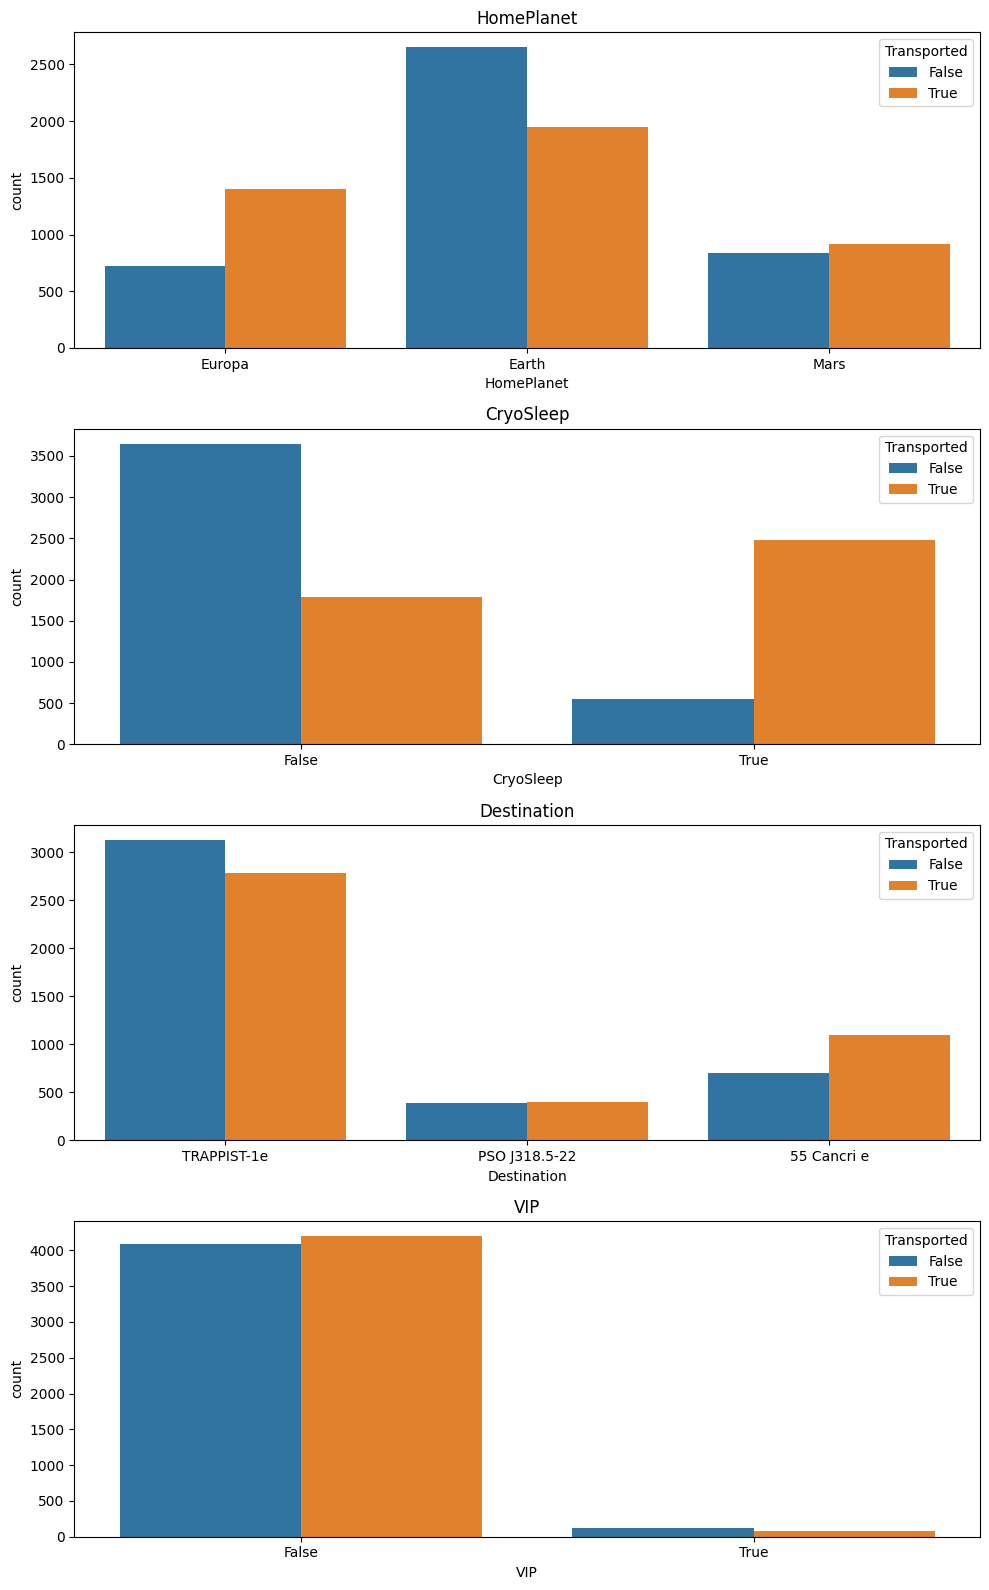

In [14]:
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

**Notes:**

* VIP does not appear to be a useful feature; the target split is more or less equal.

* CryoSleep appears the be a very useful feature in contrast.

**Insights:**

* We might consider dropping the VIP column to prevent overfitting.

### Correlation Matrix

/var/folders/z2/4v86bs5n6sg_dr0y93yxjzw80000gn/T/ipykernel_88542/3617243314.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = train.corr()


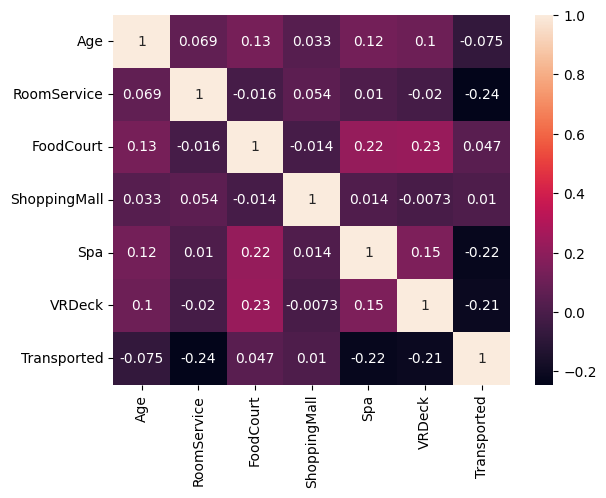

In [15]:
corrMatrix = train.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Heat Map of Missing Values

In [16]:
# Columns with missing values
na_cols=train.columns[train.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(train[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(train),2)
mv

,Number_missing,Percentage_missing
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


Text(0.5, 1.0, 'Heatmap of missing values')

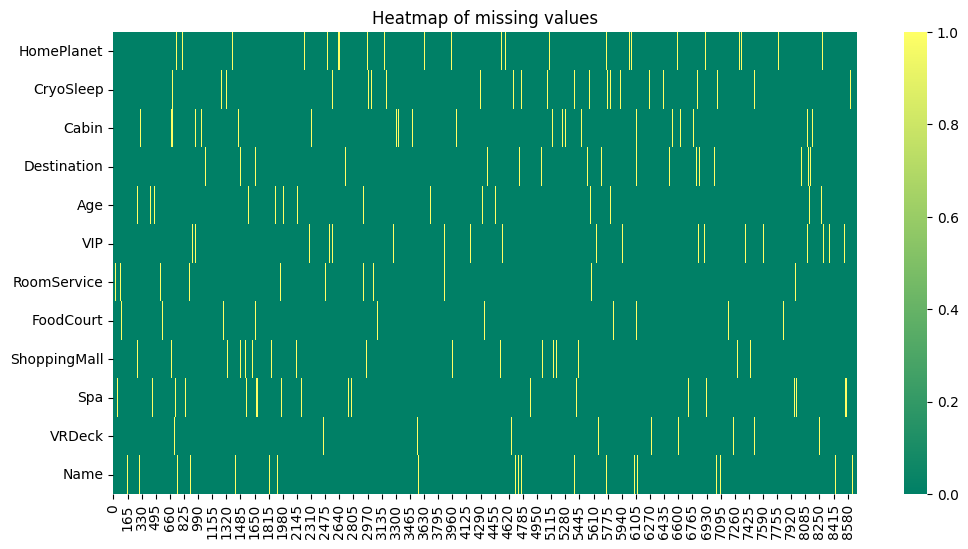

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(train[na_cols].isna().T, cmap='summer')
plt.title('Heatmap of missing values')

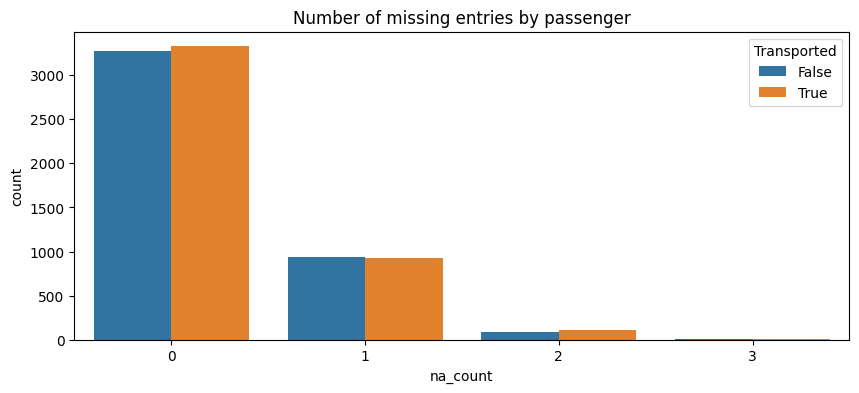

In [18]:
# Countplot of number of missing values by passenger
train['na_count']=train.isna().sum(axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=train, x='na_count', hue='Transported')
plt.title('Number of missing entries by passenger')
train.drop('na_count', axis=1, inplace=True)

**Notes:**

* Missing values are independent of the target and for the most part are isolated.

* Even though only 2% of the data is missing, about 25% of all passengers have at least 1 missing value.

* PassengerId is the only (original) feature to not have any missing values.

**Insight:**

* Since most of the missing values are isolated it makes sense to try to fill these in as opposed to just dropping rows.

* If there is a relationship between PassengerId and other features we can fill missing values according to this column.

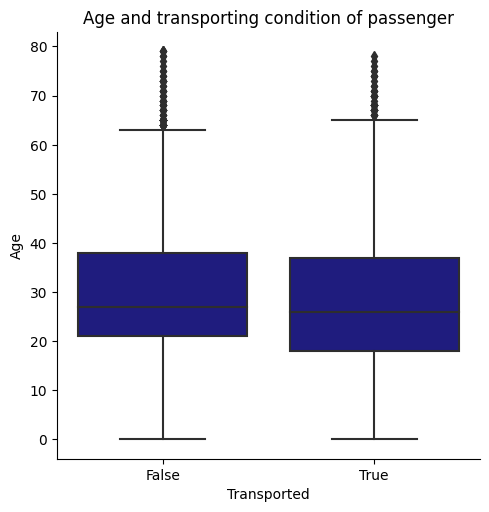

In [19]:
sns.catplot(x = "Transported",
            y = "Age",
            kind = "box",
            color = '#100C8E',
            data = train).set(title = "Age and transporting condition of passenger");

### Regplot

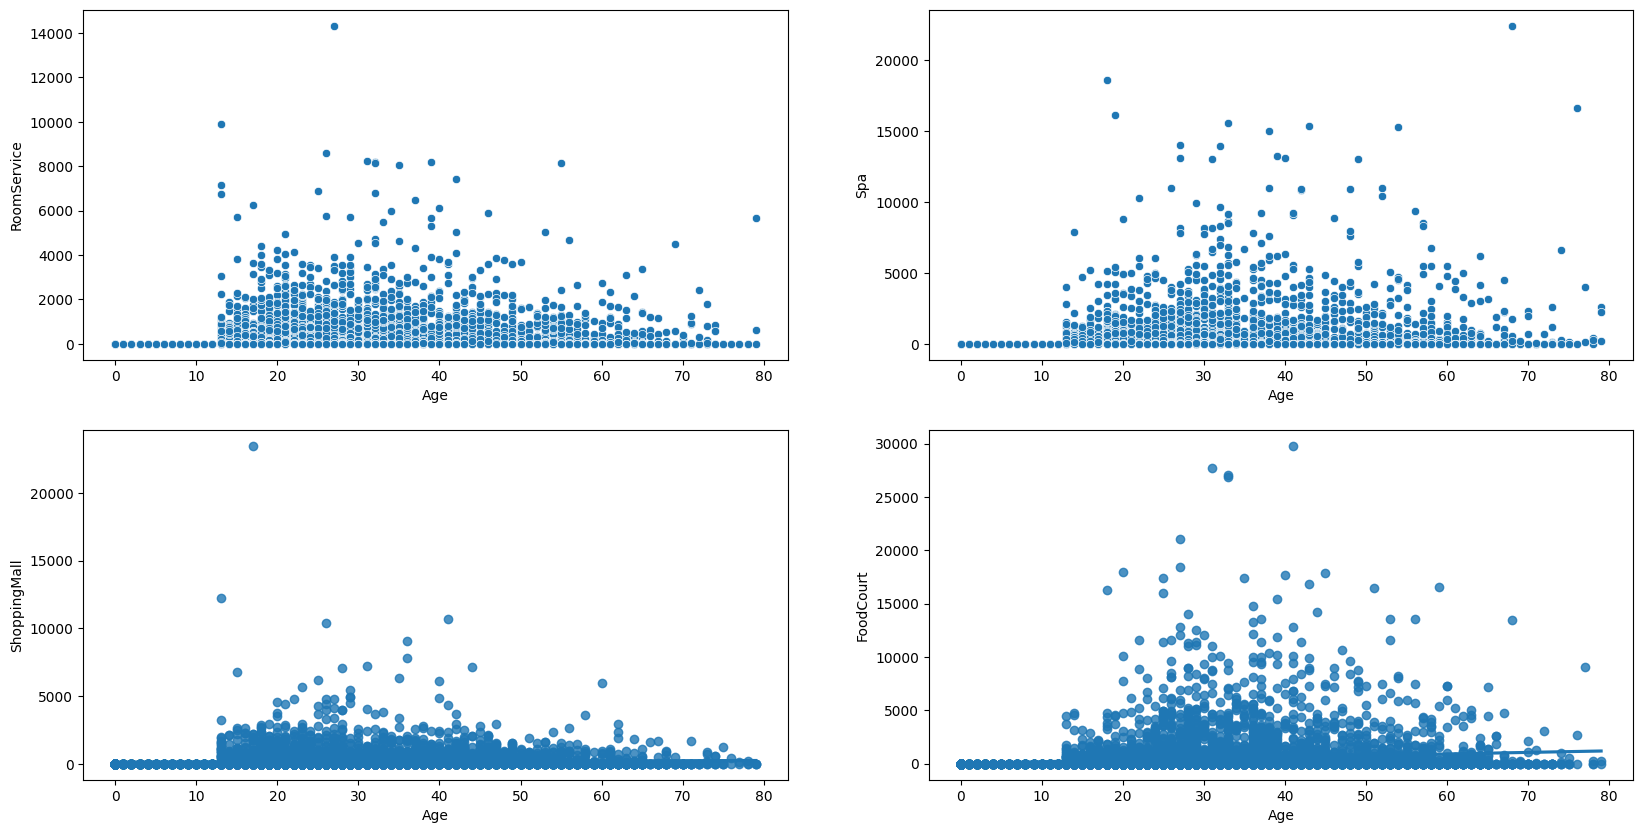

In [20]:
fig, axes = plt.subplots(2, 2, figsize = (20, 10))
axes = axes.flatten()

sns.scatterplot(ax = axes[0], x = "Age", y = "RoomService", data = train);
sns.scatterplot(ax = axes[1], x = "Age", y = "Spa", data = train);
sns.regplot(ax = axes[2], x = "Age", y = "ShoppingMall", data = train);
sns.regplot(ax = axes[3], x = "Age", y = "FoodCourt", data = train);

In [21]:
# extract deck, number and side features from Cabin
# Replace NaN's with outliers for now (so we can split feature)
train['Cabin'].fillna('Z/9999/Z', inplace=True)
test['Cabin'].fillna('Z/9999/Z', inplace=True)

# New features - training set
train['Cabin_deck'] = train['Cabin'].apply(lambda x: x.split('/')[0])
train['Cabin_number'] = train['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
train['Cabin_side'] = train['Cabin'].apply(lambda x: x.split('/')[2])

# Put Nan's back in (we will fill these later)
train.loc[train['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
train.loc[train['Cabin_number']==9999, 'Cabin_number']=np.nan
train.loc[train['Cabin_side']=='Z', 'Cabin_side']=np.nan

# drop the Cabin since we don't need it anymore
train.drop('Cabin', axis=1, inplace=True)

In [25]:
train.Cabin_deck.unique()

array(['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T'], dtype=object)

Text(0.5, 1.0, 'Cabin deck')

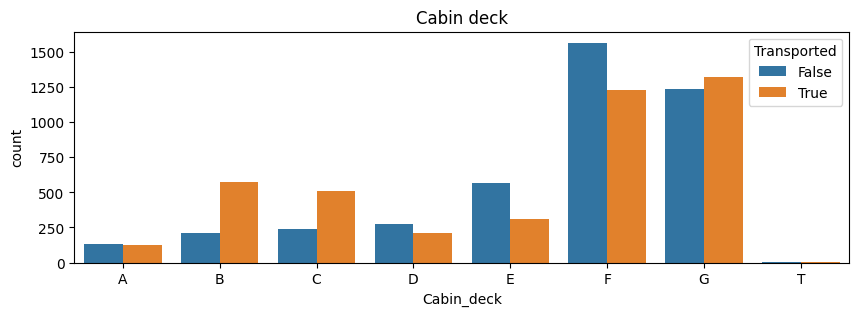

In [28]:
# Plot distribution of new features
fig=plt.figure(figsize=(10,3))

sns.countplot(data=train, x='Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

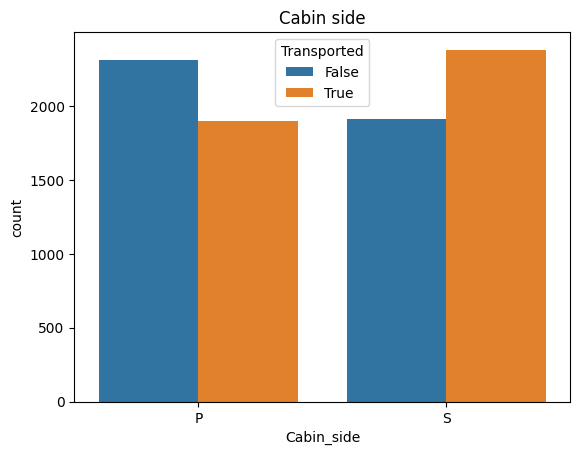

In [29]:
sns.countplot(data=train, x='Cabin_side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

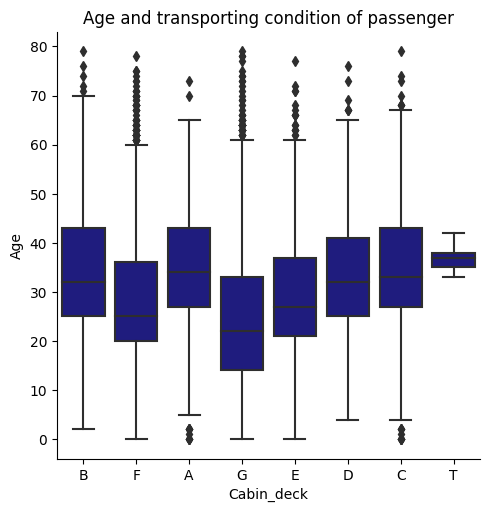

In [30]:
sns.catplot(x = "Cabin_deck",
            y = "Age",
            kind = "box",
            color = '#100C8E',
            data = train).set(title = "Age and transporting condition of passenger");

In [33]:
train['Group'] = train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

Text(0.5, 1.0, 'Group')

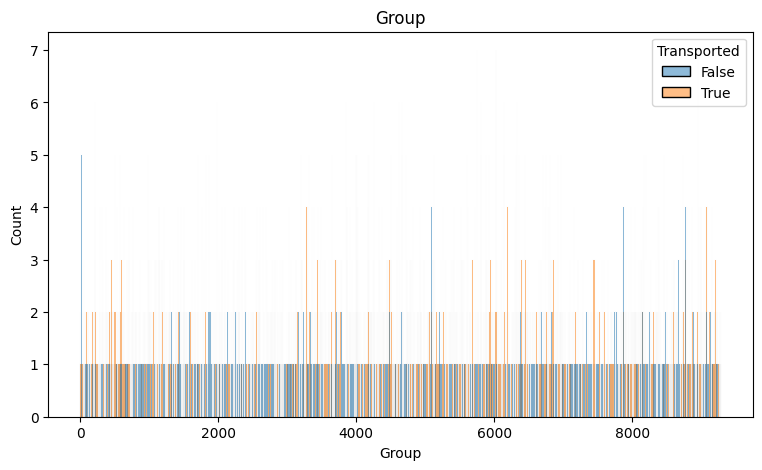

In [50]:
plt.figure(figsize=(20,5))

sns.histplot(data=train, x='Group', hue='Transported', binwidth=1)
plt.title('Group');

In [54]:
train['Group_size']=train['Group'].map(lambda x: train['Group'].value_counts()[x])

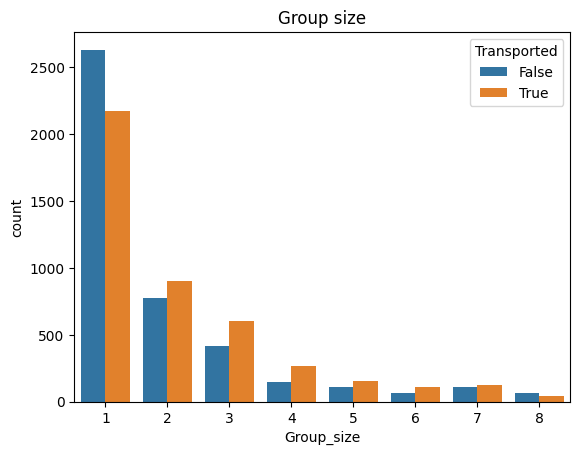

In [58]:
sns.countplot(data=train, x='Group_size', hue='Transported')
plt.title('Group size')
fig.tight_layout()

(0.0, 3000.0)

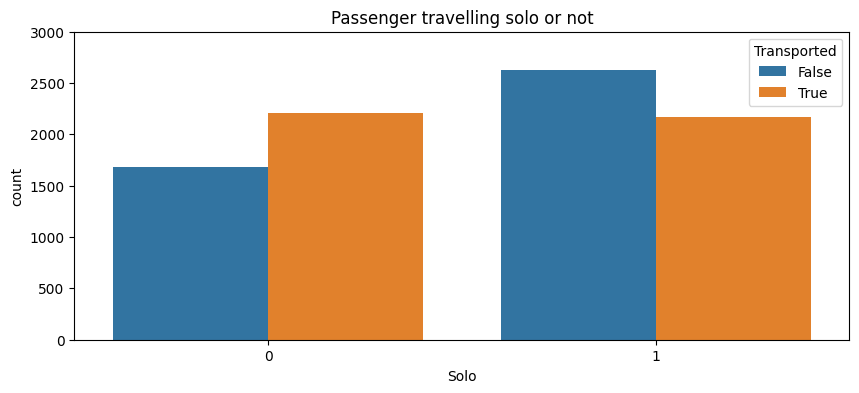

In [60]:
train['Solo']=(train['Group_size']==1).astype(int)

# New feature distribution
plt.figure(figsize=(10,4))
sns.countplot(data=train, x='Solo', hue='Transported')
plt.title('Passenger travelling solo or not')
plt.ylim([0,3000])


In [61]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Name,Transported,Cabin_deck,Cabin_number,Cabin_side,Group,Expenditure,No_spending,Group_size,Solo
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,Maham Ofracculy,False,B,0.0,P,1,0.0,1,1,1
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,Juanna Vines,True,F,0.0,S,2,736.0,0,1,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,Altark Susent,False,A,0.0,S,3,10383.0,0,2,0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,Solam Susent,False,A,0.0,S,3,5176.0,0,2,0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,Willy Santantines,True,F,1.0,S,4,1091.0,0,1,1


<AxesSubplot: xlabel='Cabin_deck', ylabel='HomePlanet'>

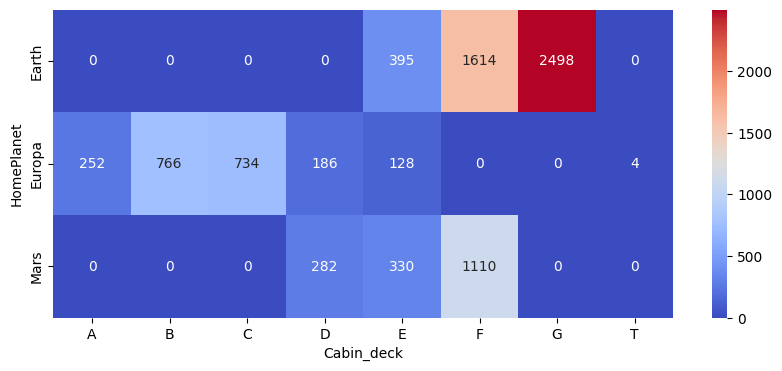

In [41]:
# Joint distribution of CabinDeck and HomePlanet
CDHP_gb=train.groupby(['Cabin_deck','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(CDHP_gb.T, annot=True, fmt='g', cmap='coolwarm')

In [42]:
CDHP_gb

HomePlanet,Earth,Europa,Mars
Cabin_deck,,,
A,0.0,252.0,0.0
B,0.0,766.0,0.0
C,0.0,734.0,0.0
D,0.0,186.0,282.0
E,395.0,128.0,330.0
F,1614.0,0.0,1110.0
G,2498.0,0.0,0.0
T,0.0,4.0,0.0


**Notes:**

* Passengers on decks A, B, C or T came from Europa.

* Passengers on deck G came from Earth.

* Passengers on decks D, E or F came from multiple planets.

<AxesSubplot: xlabel='HomePlanet', ylabel='Destination'>

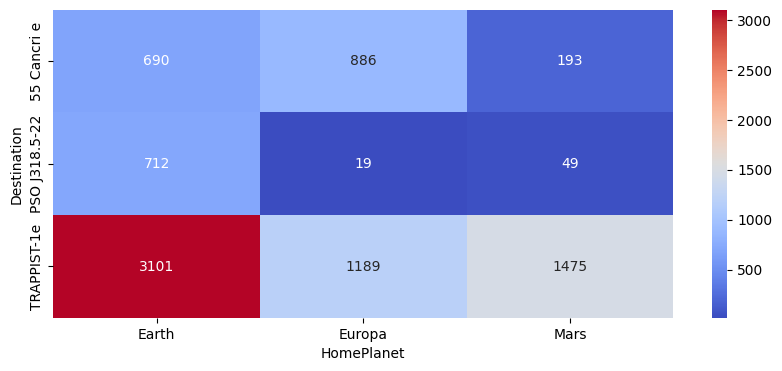

In [44]:
# Joint distribution of HomePlanet and Destination
HPD_gb=train.groupby(['HomePlanet','Destination'])['Destination'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(HPD_gb.T, annot=True, fmt='g', cmap='coolwarm')

Most people heading towards TRAPPIST-1e came from Earth so it makes sense to guess they came from there.

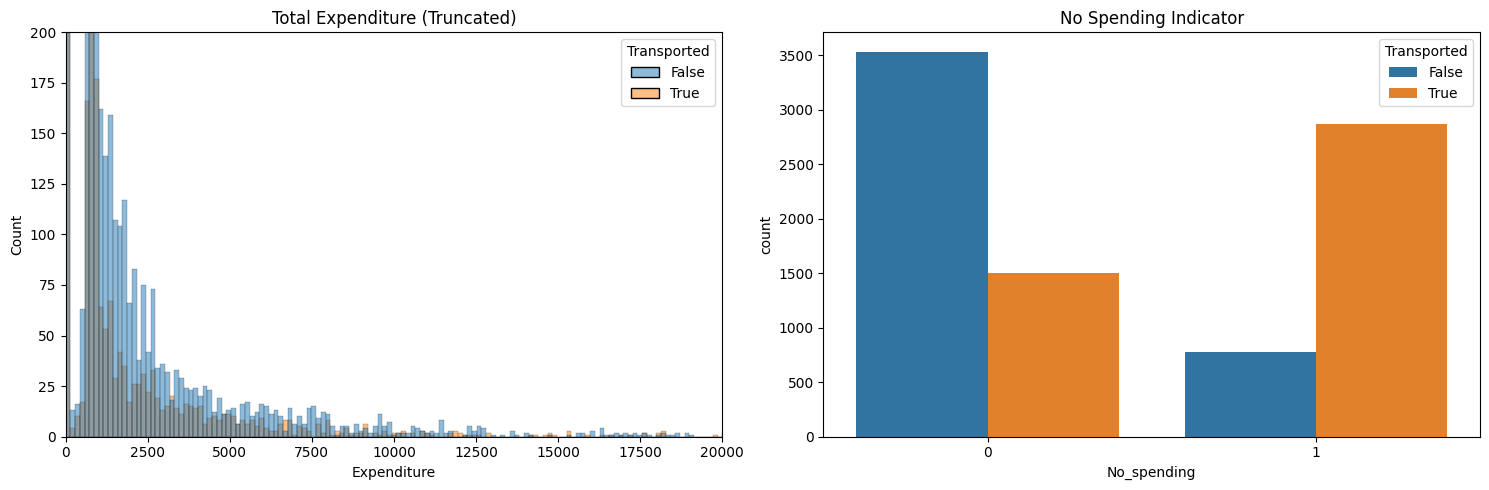

In [45]:
# Harcama
# New features - training set
train['Expenditure']=train[exp_feats].sum(axis=1)
train['No_spending']=(train['Expenditure']==0).astype(int)

# Plot distribution of new features
fig=plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=train, x='Expenditure', hue='Transported', bins=250)
plt.title('Total Expenditure (Truncated)')
plt.ylim([0,200])
plt.xlim([0,20000])

plt.subplot(1,2,2)
sns.countplot(data=train, x='No_spending', hue='Transported')
plt.title('No Spending Indicator')
fig.tight_layout()
